# Simulating Network Deliberation 

In [1]:
# Configure plotting in Jupyter
from matplotlib import pyplot as plt
%matplotlib inline
plt.rcParams.update({
    'figure.figsize': (7.5, 7.5),
    'axes.spines.right': False,
    'axes.spines.left': False,
    'axes.spines.top': False,
    'axes.spines.bottom': False})
# Seed random number generator
import random
from numpy import random as nprand

In [2]:
# Import NetworkX
import networkx as nx
import numpy as np

In [3]:
import numpy as np

### Assign nodes to groups 

In [4]:
from learning import *

In [5]:
from topologies import *

## Generates topologies

In [6]:
def generate_long_path(N, M, stage):
    '''Generates a long path network
    #Parameters:
    N: number of participants 
    M: number of participants per group
    stage: stage in the ;earning process
    
    #Returns 
    a long path network
    '''

    groups = get_long_path_stage_groups(N, M, stage)
    #print("all the groups", groups)
    G = nx.Graph()
    for group in groups:
        #print("group in groups", group) #nodes to form clique network
        g = nx.complete_graph(group) #clique network
        #print("clique network", g.nodes())
        #nx.draw(g)
        G = nx.union(G,g)
    #print("All the edges in graph G are", G.nodes())
    #nx.draw(G)
    return G

In [7]:
def generate_random_path(N, M, stage):
    """ Generates a radom network
    #Parameters
    N: number of participants 
    M: number of participants per group
    stage: stage in the ;earning process
    
    #Returns 
    a long path network
    
    """
    groups = get_random_stage_groups(N, M, stage)
    #print("all the groups", groups)
    G = nx.Graph()
    for group in groups:
        #print("group in groups", group) #nodes to form clique network
        g = nx.complete_graph(group) #clique network
        #print("clique network", g.nodes())
        #nx.draw(g)
        #adds cliques to a network 
        G = nx.union(G,g)
        #print("All the edges in graph G are", G.nodes())
        #nx.draw(G
    return G

In [8]:
def generate_complete(N, M, stage):
    '''Generates a complete network
    #Parameters
    N: number of participants 
    M: number of participants per group
    stage: stage in the ;earning process
    
    #Returns 
    a complete network
    '''
    stage = 0
    M = 0
    
    G = nx.complete_graph(N)
    
    return G

In [9]:
def generate_karate(N, M, stage):
    '''Generates a karate club network
    #Parameters
    N: number of participants 
    M: number of participants per group
    stage: stage in the ;earning process
    
    #Returns 
    a karate club network
    '''
    stage = 0
    N = 0
    M = 0
    
    G =  nx.karate_club_graph()
    
    return G

In [10]:
def generate_sw(N, M, stage):
    '''Generates a small world network
    #Parameters
    N: number of participants 
    M: number of participants per group
    stage: stage in the ;earning process
    
    #Returns 
    a SW network
    '''
    stage = 0
    M = 0
    
    G = nx.watts_strogatz_graph(N, 4, 0.1)
    
    return G

In [11]:
def generate_preferential(N, M, stage):
    '''Generates a small world network
    #Parameters
    N: number of participants 
    M: number of participants per group
    stage: stage in the ;earning process
    
    #Returns 
    a preferential attachment network
    '''
    stage = 0
    M = 0
    
    G = nx.barabasi_albert_graph(N, 1)
    
    return G

## run_trial

In [27]:
def run_trial(Graph, learning_strategy, true_value):
    """
    Plots the fraction of correct nodes in all stages of a simulation
    
    #Parameters:
    G: topology
    learning strategy: learning strategy to simulate in topology
    intial beliefs are generated inside the topology: prarms (G, true_value, p_error)
    true_value = the ground truth 
    plot: plotting function used to plot beliefs  (fixed for now)
    stages: for now is fixed, eventually will change. (fixed for now) 
    
    return
    plots the beliefs all stages
    """

    N = 100 #num of participants(nodes)
    M = 5 #group size
    stages = 5  #stages
    steps = 5 #number of steps in each learning stratey

    beliefs_stages = []
    #print("To keep beliefs after stages", beliefs_stages)
    
    
    for stage in range(stages):
        G = Graph(N, M, stage)
        if stage == 0: 
            ini_beliefs = initial_beliefs_noisy(G, true_value, p_error= .40)
            beliefs_stages = [ini_beliefs]
            #print("Stage #", stage)
            #print("The initial beliefs at stage", stage, "are", ini_beliefs)
            beliefs_list =  learn(G, ini_beliefs, learning_step_best_neighbor, true_value, steps)
            beliefs_stages += beliefs_list
            #print("Beliefs at stage", stage, "after learn() are", beliefs_stages)

        else:
            sub_ini_beliefs = beliefs_stages[-1]
            #print("Stage #", stage)
            #print("The initial beliefs at stage", stage, "are", sub_ini_beliefs)
            beliefs_list = learn(G, sub_ini_beliefs, learning_step_best_neighbor, true_value, steps)
            beliefs_stages += beliefs_list
            #print("Beliefs at", stage, "after learn() are", beliefs_stages)
    plot_beliefs_correct(beliefs_stages, true_value)

In [28]:
networks = {
    'Long Path': generate_long_path,
    'Random Path': generate_random_path,
    'Complete Graph': generate_complete,
    'Preferential Attachment': generate_preferential,
    'Small World': generate_sw,
    'Karate Club': generate_karate}

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


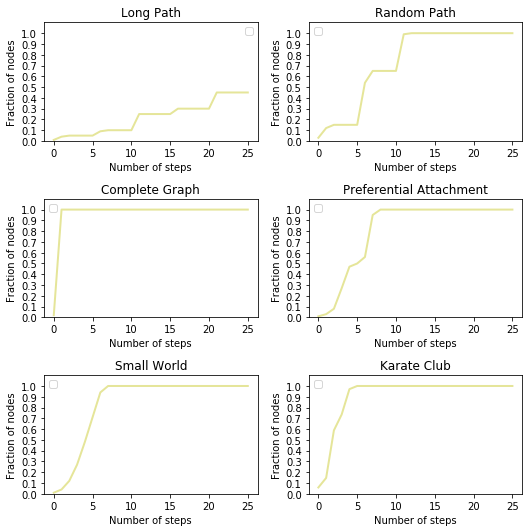

In [29]:
for i, (title, Graph) in enumerate(networks.items()):
    plt.subplot(3, 2, i + 1)
    plt.title(title)
    run_trial(Graph, learning_step_best_neighbor, true_value = [1, 1, 1, 1, 1, 1, 1])
plt.tight_layout()

# Old plotting

# old plotting code 

# old code 